Accuracy on test set: 0.6396440929312902


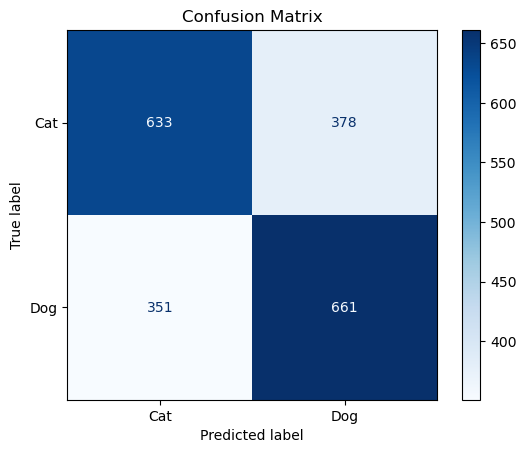

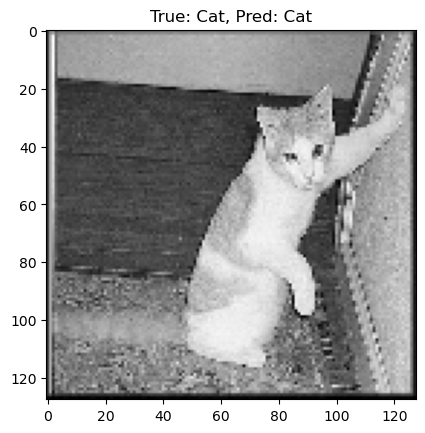

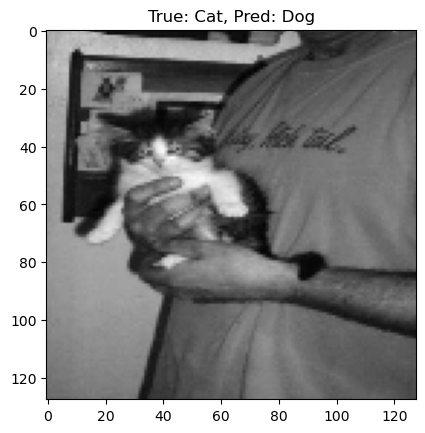

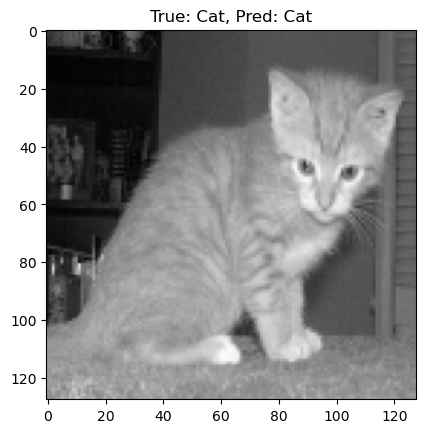

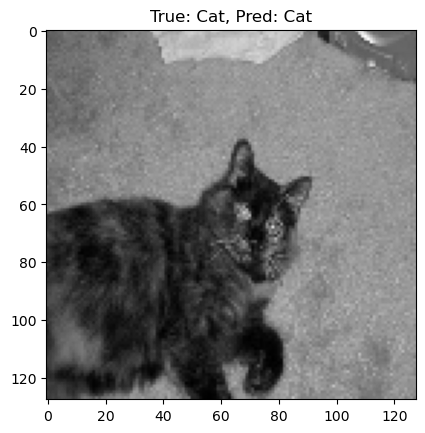

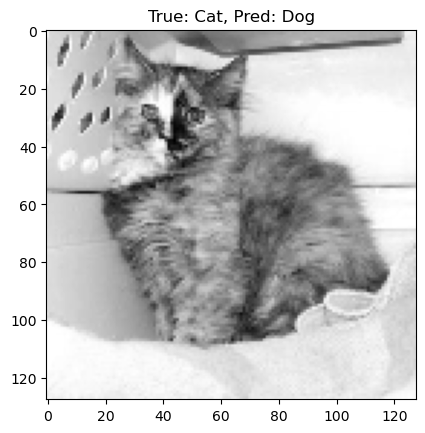

Number of misclassifications: 729


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def load_images_from_folder(folder, label, img_size=(128, 128)):  
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            images.append(img.flatten()) 
            labels.append(label)
    return images, labels
train_dir_cats = r"C:\Users\Gopib\Downloads\Dogs_vs_Cats\training_set\training_set\cats"
train_dir_dogs = r"C:\Users\Gopib\Downloads\Dogs_vs_Cats\training_set\training_set\dogs"
test_dir_cats = r"C:\Users\Gopib\Downloads\Dogs_vs_Cats\test_set\test_set\cats"
test_dir_dogs = r"C:\Users\Gopib\Downloads\Dogs_vs_Cats\test_set\test_set\dogs"

train_images_cats, train_labels_cats = load_images_from_folder(train_dir_cats, label=0)  # Cats = 0
train_images_dogs, train_labels_dogs = load_images_from_folder(train_dir_dogs, label=1)  # Dogs = 1

test_images_cats, test_labels_cats = load_images_from_folder(test_dir_cats, label=0)  # Cats = 0
test_images_dogs, test_labels_dogs = load_images_from_folder(test_dir_dogs, label=1)  # Dogs = 1

X_train_raw = np.array(train_images_cats + train_images_dogs)
y_train = np.array(train_labels_cats + train_labels_dogs)

X_test_raw = np.array(test_images_cats + test_images_dogs)
y_test = np.array(test_labels_cats + test_labels_dogs)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw) 
X_test_scaled = scaler.transform(X_test_raw)        


pca = PCA(n_components=150) 
X_train_pca = pca.fit_transform(X_train_scaled)  
X_test_pca = pca.transform(X_test_scaled)     
svm = SVC(kernel='rbf', C=1) 
svm.fit(X_train_pca, y_train)  
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

for i in range(5):  
    original_img = X_test_raw[i].reshape(128, 128)  
    plt.imshow(original_img, cmap='gray')
    plt.title(f"True: {'Dog' if y_test[i] == 1 else 'Cat'}, Pred: {'Dog' if y_pred[i] == 1 else 'Cat'}")
    plt.show()

incorrect_indexes = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
print(f"Number of misclassifications: {len(incorrect_indexes)}")
